# NYC 311 Mini‑Project — Missing Data • Regex • Visualization • Pandas/Numpy
**Class day:** 2025-10-17

You will explore a recent slice of NYC 311 service requests (last 1,000 rows). Your goals:

- Practice the *data science process*: posing questions → wrangling/cleaning → analysis → communicating.
- Use tools such as **missing‑data handling**, **regex**, **Pandas/Numpy**, and **visualization**.
- Produce **one figure** answering the guided question and **one figure** answering your own question.


## 1) Setup & Load Data


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import contextily as ctx

pd.set_option("display.max_colwidth", 120)
pd.set_option("display.width", 120)

df = pd.read_csv('erm2-nwe9.csv')
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,66464514,2025-10-14T01:51:17.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,655 EAST 230 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.891872,-73.860168,"\n, \n(40.89187241649303, -73.86016845296459)"
1,66465967,2025-10-14T01:51:14.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11212.0,181 ROCKAWAY PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.662317,-73.921442,"\n, \n(40.66231674694474, -73.92144177201318)"
2,66470344,2025-10-14T01:50:47.000,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11436.0,137-32 132 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669856,-73.800419,"\n, \n(40.6698558316466, -73.80041885315545)"
3,66464521,2025-10-14T01:50:42.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Television,Residential Building/House,10458.0,2980 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.871881,-73.886143,"\n, \n(40.87188118407785, -73.88614285307307)"
4,66470365,2025-10-14T01:50:33.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,655 EAST 230 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.891872,-73.860168,"\n, \n(40.89187241649303, -73.86016845296459)"


## 2) Explore the Data

You can learn more about the dataset [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data)

Explore the data to understand its structure and content. Consider the following questions:
- What are the key columns in the dataset?
- What types of data are present (numerical, categorical, text, etc.)?
- What are the distributions of key variables?
- Are there any missing values or anomalies in the data?

Here is some starter code to help look at missingness that you can copy and paste in a code cell::

```python
missing = df.isna().mean().sort_values(ascending=False)
print("Share missing (top 20):")
display(missing.head(20).to_frame("share_missing"))
```

> `df['column_name'].value_counts()` can be useful for exploring categorical variables.

Top 10 agencies by number of requests:


,num_requests
agency_name,
New York City Police Department,723
Department of Housing Preservation and Development,149
Department of Sanitation,30
Department of Transportation,24
Department of Parks and Recreation,19
Department of Homeless Services,18
Department of Environmental Protection,14
Department of Health and Mental Hygiene,12
Taxi and Limousine Commission,6


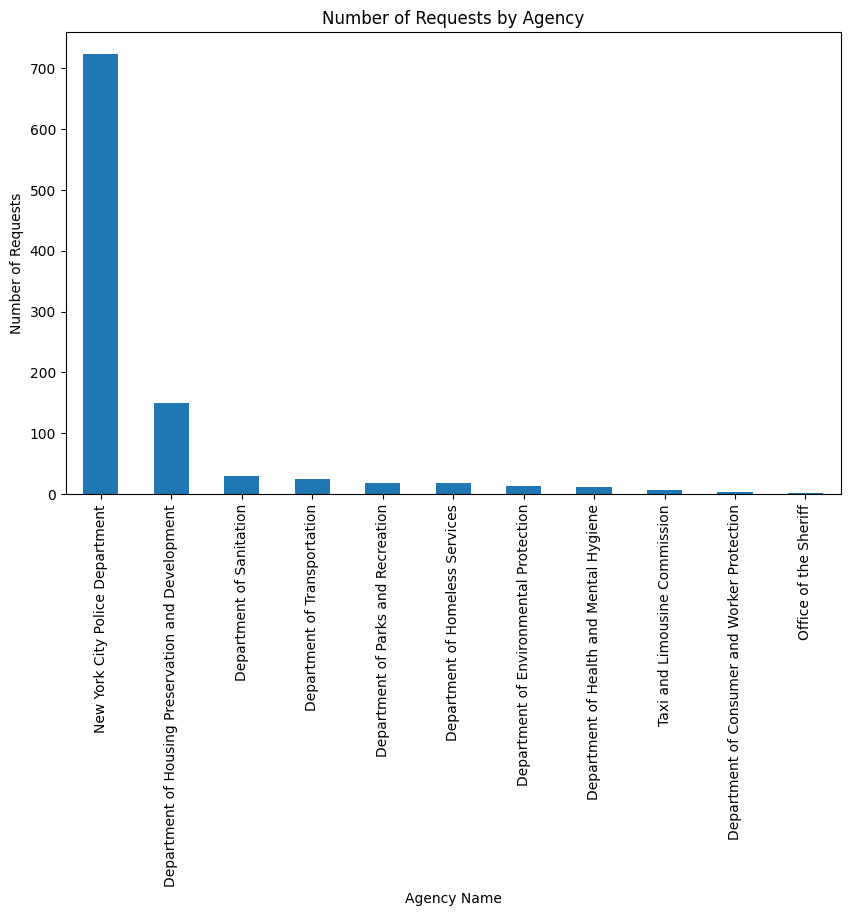


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      1000 non-null   int64  
 1   created_date                    1000 non-null   object 
 2   closed_date                     536 non-null    object 
 3   agency                          1000 non-null   object 
 4   agency_name                     1000 non-null   object 
 5   complaint_type                  1000 non-null   object 
 6   descriptor                      979 non-null    object 
 7   location_type                   968 non-null    object 
 8   incident_zip                    990 non-null    float64
 9   incident_address                980 non-null    object 
 10  street_name                     980 non-null    object 
 11  cross_street_1                  815 non-null    object 
 12  cross_street_2      

In [26]:
#missing = df.isna().mean().sort_values(ascending=False)
#print("Share missing (top 20):")
#display(missing.head(20).to_frame("share_missing"))

#print(df.info())

counts = df['agency_name'].value_counts()
print("Top 10 agencies by number of requests:")
display(counts.head(10).to_frame("num_requests"))

ax = counts.plot(kind='bar', figsize=(10, 6), title='Number of Requests by Agency')
ax.set_xlabel('Agency Name')
ax.set_ylabel('Number of Requests')
plt.show()

print("\nDataset info:")
print(df.info())

Data for agency: NYPD
Top 4 call types for NYPD:


,num_calls
complaint_type,
Noise - Residential,423
Illegal Parking,144
Noise - Street/Sidewalk,38
Noise - Commercial,31


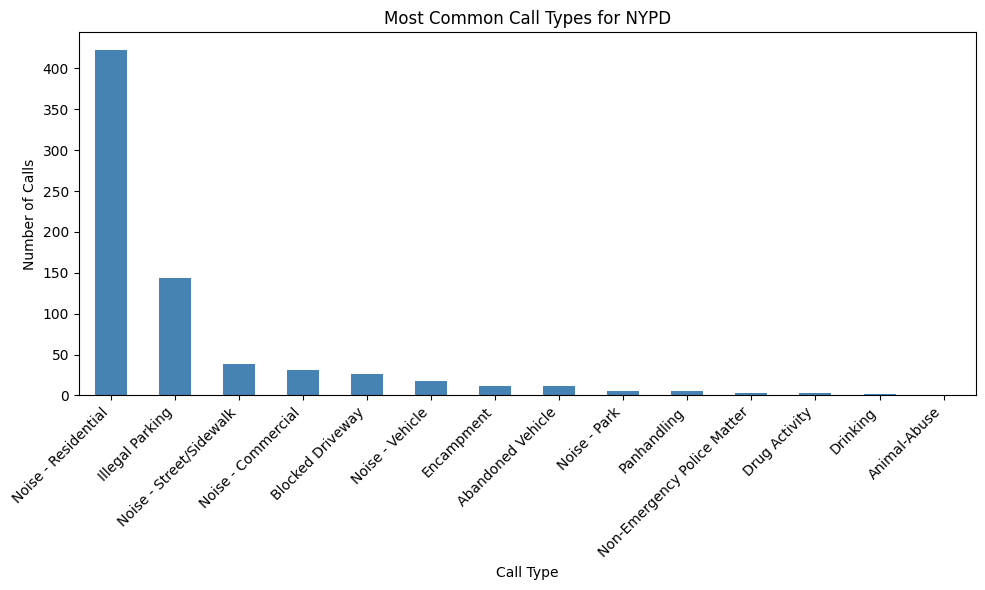

In [25]:
agency = 'NYPD'
agency_df = df[df['agency'] == agency]
print(f"Data for agency: {agency}")

call_counts = agency_df['complaint_type'].value_counts()
top_4 = call_counts.head(4)
print(f"Top 4 call types for {agency}:")
display(top_4.to_frame("num_calls"))

plt.figure(figsize=(10, 6))
call_counts.plot(kind="bar", color="steelblue")

plt.title(f"Most Common Call Types for {agency}")
plt.xlabel("Call Type")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



## 3) What Keywords in resolution_description are Associated with Longer Resolution Times?

You will need to compute the resolution time for each request. You can do this by calculating the difference between the `closed_date` and `created_date` columns using code like this:
```python
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['closed_date'] = pd.to_datetime(df['closed_date'], errors='coerce')
df["resolution_time_hours"] = (df["closed_date"] - df["created_date"]).dt.total_seconds() / 3600.0
```

Think about how you will handle missing values in your analysis since some requests may not have a `closed_date`.

## 4) Pick another question to explore

Make sure to create a figure to answer your question!

**Ideas to help you come up with your own.**
- Are there certain locations that take longer to resolve issues?
- Are there specific types of complaints that are more common in certain areas?
- Are open cases different in nature from closed cases?

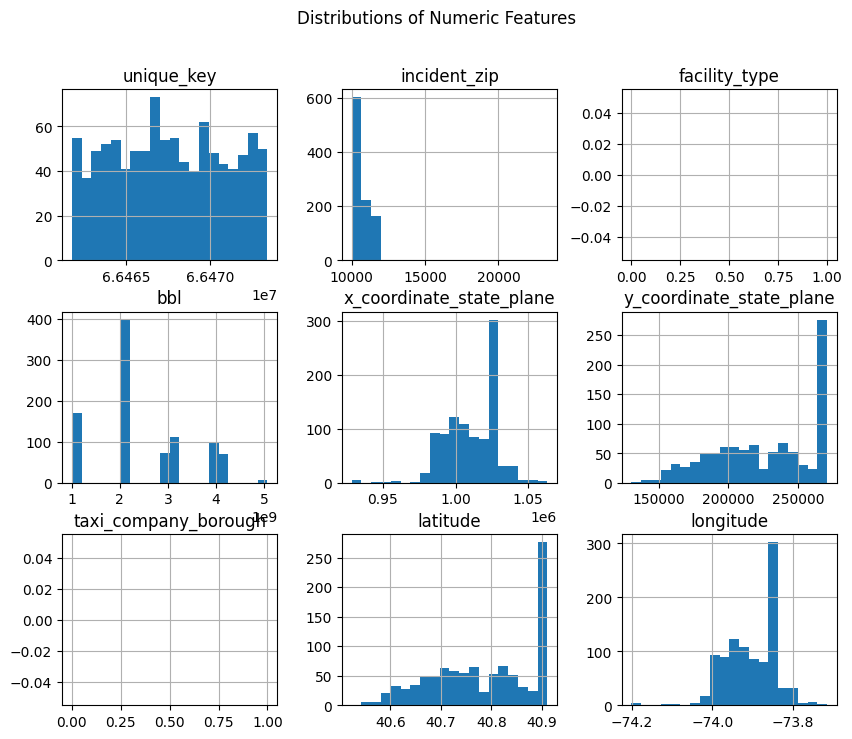

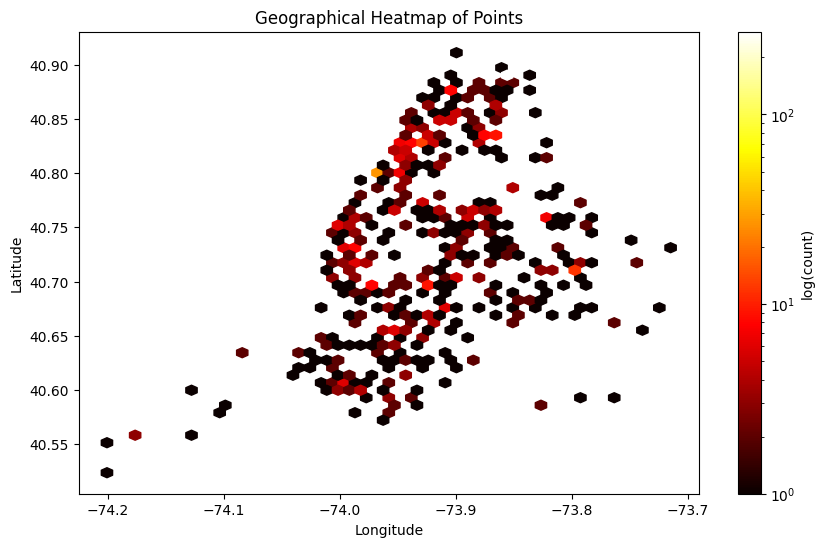

In [7]:
df.hist(bins=20, figsize=(10, 8))
plt.suptitle("Distributions of Numeric Features")
plt.show()

plt.figure(figsize=(10, 6))
plt.hexbin(df['longitude'], df['latitude'], gridsize=50, cmap='hot', bins='log')
plt.colorbar(label='log(count)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Heatmap of Points')
plt.show()

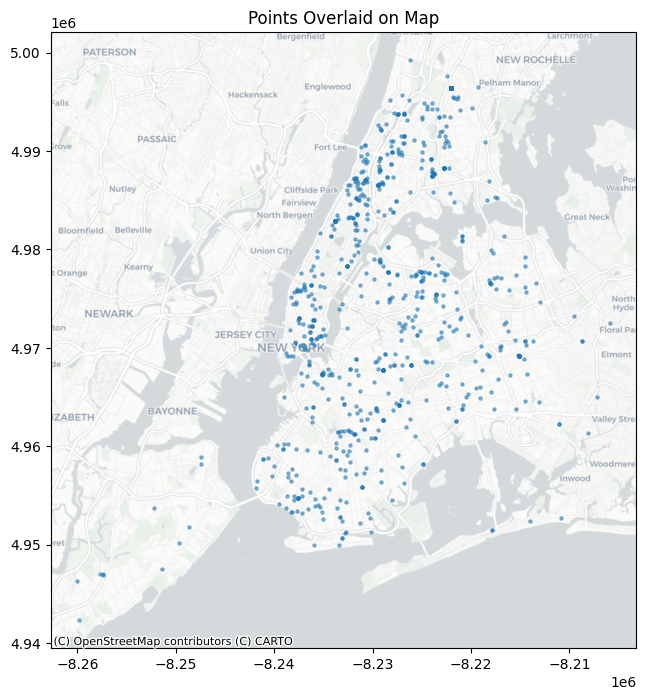

In [13]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

# Convert to Web Mercator
gdf = gdf.to_crs(epsg=3857)

# Plot points and basemap
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, alpha=0.5, markersize=5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title("Points Overlaid on Map")
plt.show()